In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\hp\anaconda3\lib\site-packages (0.8.0)


In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = df.drop('target',1)
y= df['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

2. Explore the data. Notice all columns are numerical. Therefore separate the continuous from the discrete features.

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
continuous = []
for column in df.columns:
    if df[column].dtypes != 'object':
        if df[column].nunique() >= 20:
            continuous.append(column)
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
discrete = []
for column in df.columns:
    if df[column].dtypes != 'object':
        if df[column].nunique() <= 20:
            discrete.append(column)
discrete.remove('target')
discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

3. Identify any presence of outliers in the continuous features and resolve them using the IQR method.


<AxesSubplot:>

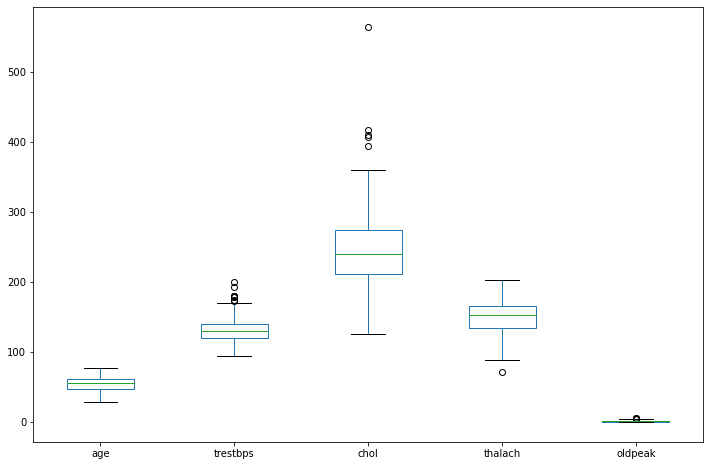

In [11]:
df[continuous].plot(kind = 'box', figsize = (12, 8))

In [12]:
continuous  = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
continuous

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


<AxesSubplot:>

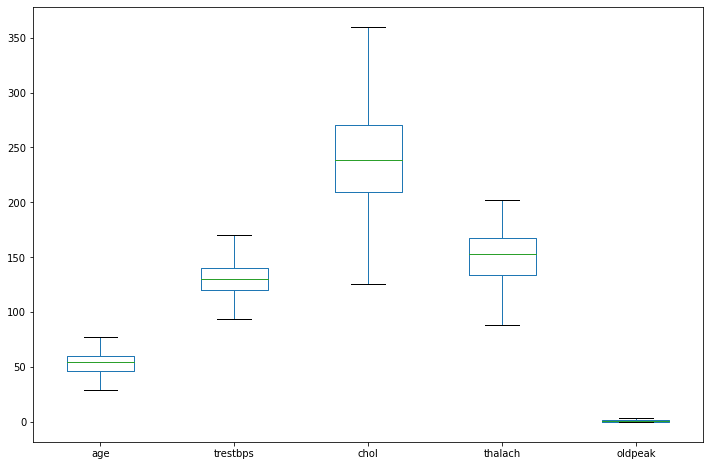

In [13]:
Q1 = continuous.quantile(0.25)
Q3 = continuous.quantile(0.75)
IQR = Q3 - Q1
removed_outliers = continuous[~((continuous < (Q1 - 1.5 * IQR)) | (continuous > (Q3 + 1.5 * IQR))).any(axis=1)]
removed_outliers.plot(kind = 'box', figsize = (12, 8))

4. Binned the continuous column values apart from the column ‘oldpeak’.

In [14]:
pd.qcut(removed_outliers['age'], q=4),pd.qcut(removed_outliers['chol'], q=4), pd.qcut(removed_outliers['trestbps'], q=4),pd.qcut(removed_outliers['thalach'], q=4)

(0         (60.0, 77.0]
 1      (28.999, 46.75]
 2      (28.999, 46.75]
 3         (55.0, 60.0]
 4         (55.0, 60.0]
             ...       
 298       (55.0, 60.0]
 299    (28.999, 46.75]
 300       (60.0, 77.0]
 301       (55.0, 60.0]
 302       (55.0, 60.0]
 Name: age, Length: 284, dtype: category
 Categories (4, interval[float64]): [(28.999, 46.75] < (46.75, 55.0] < (55.0, 60.0] < (60.0, 77.0]],
 0        (209.75, 239.0]
 1        (239.0, 270.25]
 2      (125.999, 209.75]
 3        (209.75, 239.0]
 4        (270.25, 360.0]
              ...        
 298      (239.0, 270.25]
 299      (239.0, 270.25]
 300    (125.999, 209.75]
 301    (125.999, 209.75]
 302      (209.75, 239.0]
 Name: chol, Length: 284, dtype: category
 Categories (4, interval[float64]): [(125.999, 209.75] < (209.75, 239.0] < (239.0, 270.25] < (270.25, 360.0]],
 0       (140.0, 170.0]
 1       (120.0, 130.0]
 2       (120.0, 130.0]
 3      (93.999, 120.0]
 4      (93.999, 120.0]
             ...       
 298     (1

5. Separate the features from the labels and use the most appropriate feature selection technique(s).


In [15]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]   

[0.06846164 0.0541729  0.12616329 0.06220146 0.06204504 0.02072497
 0.0347488  0.08923526 0.10412631 0.08822672 0.07254005 0.12194154
 0.09541201]


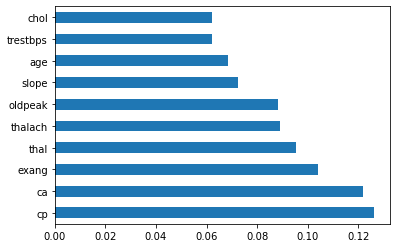



The Important Features would be 
 oldpeak 
 thalach 
 thal 
 exang 
 cp 
 ca


In [16]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
print('\n')
print('The Important Features would be \n oldpeak \n thalach \n thal \n exang \n cp \n ca')

6. Slice the data and scale the features

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)


In [18]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_m = norm.transform(X_train)
X_test_m = norm.transform(X_test)
X_train_m

array([[0.5625    , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.5       ],
       [0.70833333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.9375    , 0.        , 0.33333333, ..., 1.        , 0.25      ,
        0.5       ],
       ...,
       [0.75      , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.4375    , 1.        , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.83333333, 0.        , 1.        , ..., 1.        , 0.5       ,
        0.5       ]])

7.  Identify the data if the data is balanced. If not, sample the data using the most appropriate method keeping the size of the data in mind

<AxesSubplot:xlabel='target', ylabel='count'>

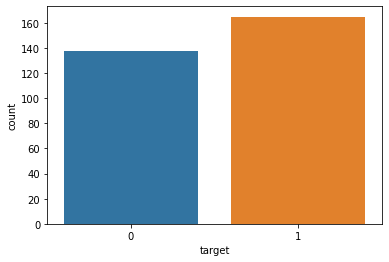

In [19]:
import seaborn as sns
sns.countplot(x='target', data = df)

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_train_m_over, y_train_over = oversample.fit_resample(X_train_m, y_train)
print(Counter(y_train_over))

Counter({0: 116, 1: 116})


In [21]:
X_test_m_over, y_test_over = oversample.fit_resample(X_test_m, y_test)
print(Counter(y_test_over))

Counter({1: 49, 0: 49})


8. Using at least 4 classification methods, identify the best machine learning model using their training and testing accuracy scores.

In [22]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca_train = pca.fit(X_train_m_over, y_train_over)
pca_train

PCA(n_components=0.95)

In [23]:
X_train_m_over_pca = pd.DataFrame(pca_train.transform(X_train_m_over))
X_train_m_over_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.733752,-0.110742,0.620778,-0.698229,-0.230349,0.091837,-0.125264,0.170261,-0.136576,0.012567
1,0.146782,-0.292083,-0.167416,0.285411,-0.453552,-0.222484,-0.253317,-0.151982,0.053313,0.074581
2,0.227475,0.845388,-0.023796,-0.336554,0.309792,0.289159,-0.093148,-0.406534,0.028322,0.400147
3,1.111838,0.086347,0.238016,0.558362,-0.090920,-0.171139,0.191927,0.388314,0.182867,-0.044294
4,-0.754527,0.454854,-0.132064,-0.060705,0.227964,0.127924,-0.301120,-0.087988,-0.207876,0.188546


In [24]:
pca_test = pca.fit(X_test_m_over, y_test_over)
pca_test

PCA(n_components=0.95)

In [25]:
X_test_m_over_pca = pd.DataFrame(pca_test.transform(X_test_m_over))
X_test_m_over_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.083574,0.927445,-0.345832,0.151909,-0.338543,0.194033,0.299532,0.386950,-0.359485,-0.022576
1,0.465494,-0.451555,-0.161105,0.126048,0.063037,0.133021,0.203023,0.039078,-0.064057,-0.046840
2,0.195113,0.604646,-0.386417,0.424783,-0.639305,-0.473734,-0.154582,-0.198131,0.115949,-0.116171
3,0.286303,-0.516843,0.004250,-0.220801,0.016246,-0.253413,-0.400686,0.132253,0.194654,0.241568
4,0.881033,0.382015,-0.129301,-0.032446,-0.222313,-0.374713,-0.081647,-0.107151,0.038821,0.077130


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [27]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
        }

In [28]:
train_scores =[]
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_m_over_pca, y_train_over)
    train_score = round(classifier.score(X_train_m_over_pca, y_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_test_m_over_pca, y_test_over),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.82, 0.86, 0.9, 1.0]
[0.18, 0.17, 0.17, 0.27]


9. Hyper parameter tune the best model using grid search to identify the best performing model.

In [29]:
from sklearn.model_selection import GridSearchCV
